# T2-1

Desenvolva um sistema que apresente um mapa com informações da sua escolha, respondendo ao itens 1 e 2.

In [ ]:
%%bash
#Instalação das bibliotecas
pip3 install geopandas
pip3 install geobr

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for geobr: filename=geobr-0.1.9-py3-none-any.whl size=35289 sha256=d6a76620b4e4041bf715a11d1158d34a8168204fa3975bc681a2385903f9fd10
  Stored in directory: /root/.cache/pip/wheels/03/8e/a2/d167d4ea2259adb24d9a119ebd0e768c77d2cfbd8a15c5a734
Successfully built geobr
  Attempting uninstall: Shapely
    Found existing installation: Shapely 1.7.1
    Uninstalling Shapely-1.7.1:
      Successfully uninstalled Shapely-1.7.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
#Importação das bibliotecas
import geopandas as gpd
import geobr 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
geobr.list_geobr()

Function: read_country
Geographies available: Country
Years available: 1872, 1900, 1911, 1920, 1933, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_region
Geographies available: Region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_state
Geographies available: States
Years available: 1872, 1900, 1911, 1920, 1933, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_meso_region
Geographies available: Meso region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_micro_region
Geographies available: Micro region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020

## Item 1

Desenvolva uma aplicação utilizando Python e Geopandas que apresente de forma gráfica um mapa, considerando informações de sua escolha. Analise, detalhe e explique as informações apresentadas. É requerido que **ao menos um mapa** seja obtido da fonte de dados **GeoBR**. Mapas já trabalhados podem ser utilizados, porém as informações analisadas devem ser diferentes dos exemplos e exercícios já utilizados nas aulas.

In [ ]:
gdfUrban = geobr.read_urban_concentrations()
gdfUrban.head(2)

,code_urban_concentration,name_urban_concentration,code_muni,name_muni,pop_total_2010,pop_urban_2010,pop_rural_2010,code_state,abbrev_state,name_state,geometry
0,1100122.0,Ji-Paraná,1100122.0,Ji-Paraná,116610.0,96677,19933,11.0,RO,Rondônia,"MULTIPOLYGON (((-61.53650 -9.79384, -61.52817 ..."
1,1100205.0,Porto Velho/RO,1100205.0,Porto Velho,428527.0,390636,37891,11.0,RO,Rondônia,"MULTIPOLYGON (((-65.44267 -9.46470, -65.43472 ..."


In [ ]:
gdfEstados = geobr.read_state()
gdfEstados.head(2)

,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ..."
1,12.0,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ..."


In [ ]:
gdfEstados['num_urban'] = 0 
num_Urbanização = gdfEstados['num_urban'].copy()
for i in gdfUrban['geometry'].squeeze():
    num_Urbanização[gdfEstados.contains(i)]+=1 
gdfEstados['num_urban'] = num_Urbanização 


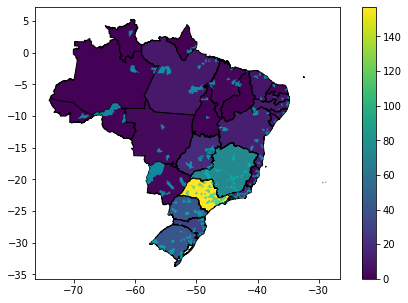

In [ ]:
aux = gdfEstados.plot(column='num_urban', legend=True, figsize=(8,5),edgecolor='k')
gdfUrban.plot(ax=aux,color='c', alpha=0.7)  

Esse grafico acima mostra a quantidade de cidades urbanizadas por estado e destaca as regiões urbanizadas.

## Item 2

Desenvolva uma aplicação utilizando Python e Geopandas que apresente de forma gráfica um mapa, considerando informações de sua escolha. Analise, detalhe e explique as informações apresentadas. É requerido que **ao menos um mapa** seja obtido de fonte de dados **diferente** da GeoBR. Mapas já trabalhados podem ser utilizados, porém as informações analisadas devem ser diferentes dos exemplos e exercícios já utilizados nas aulas.

In [ ]:
import datashader as ds, colorcet
from google.colab import drive
drive.mount('/drive') 
DRIVE='/drive/Shareddrives/BasesPublicas/'


Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
cvel_bairros = gpd.read_file(DRIVE+'Mapas/Cascavel/vw_bairros.zip')

cvel_distritos = gpd.read_file(DRIVE+'/Mapas/Cascavel/vw_distritos.zip')

cvel_pracas = gpd.read_file(DRIVE+'/Mapas/Cascavel/Pracas.zip')

,id,Nome,Lei,geometry
0,35.0,Praça Geraldo Bonatto,2898-99,POINT (257526.808 7237039.662)
1,37.0,Praça Pedro Roman,1338-1997,POINT (264208.442 7204055.764)
2,NaN,Praça da Biblia - Vereador Luiz Picoli,5753-2011,POINT (249834.603 7237844.029)
3,NaN,Praça do Migrante - Florêncio Galafassi,1318-1977,POINT (250475.508 7237775.496)
4,NaN,Praça Getulia Dornele Vargas,4313-2006 e 25-1953,POINT (250628.837 7237731.936)


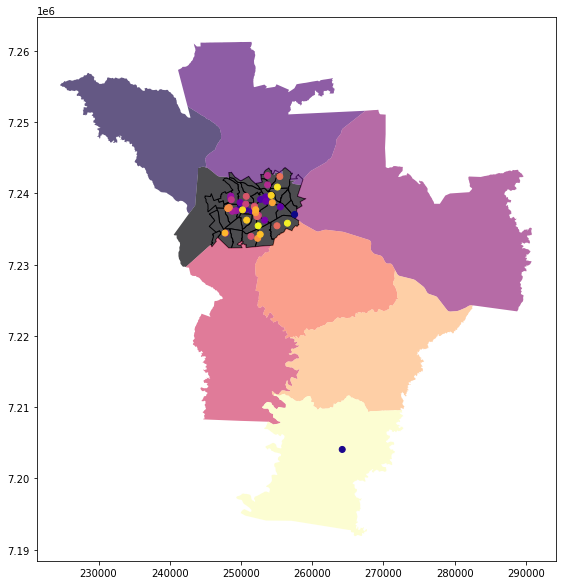

In [ ]:
aux = cvel_bairros.plot(edgecolor='k', color='w',figsize=(10,10))
cvel_distritos.plot(ax=aux,cmap='magma',alpha=0.7)
cvel_pracas.plot(ax=aux,cmap='plasma')
cvel_pracas.head()

Mostrando as praças que existem em cada distrito

In [ ]:
cvel_distritos['num_praca'] = 0 
num_praca = cvel_distritos['num_praca'].copy()
for i in cvel_pracas['geometry'].squeeze():
    num_praca[cvel_pracas.contains(i)]+=1 
cvel_bairros['num_praca'] = num_praca 


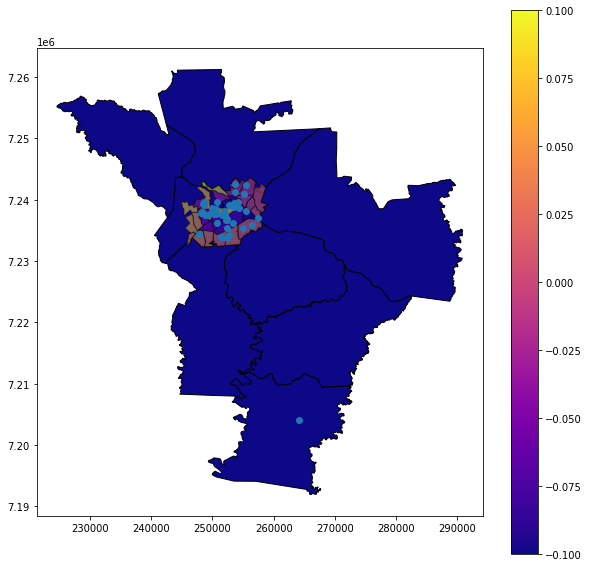

In [ ]:
aux = cvel_distritos.plot(column='num_praca', legend=True, figsize=(10,10),edgecolor='k',cmap='plasma')
cvel_bairros.plot(ax=aux,legend=True,edgecolor='k',cmap='plasma',alpha=0.5)
cvel_pracas.plot(ax=aux)  

Mostrando a quantidade de praças que existem em cada distrito mas devido a alguns distritos terem menos que uma(no caso nenhuma) a matematica não fica tão entendivel.
Além disso vemos que 99% das praças ficam apenas na cidade de cascavel, tendo apenas uma fora dessa região.
